In [1]:
import pandas as pd 
import numpy as np

In [2]:
df =pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# Cleaning Data 
#EDA
#Text Preprocessing
#Model Building 
#Evaluation
#Building Website 
#Deployement on vercel

# Cleaning

In [6]:
# Droping Last three column
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# renaming the columns 
df.rename(columns={'v1': 'target', 'v2':'text'},inplace=True)
df.head(5)


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(403)

In [13]:
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:

df.shape

(5169, 2)

# EDA

In [16]:
import matplotlib.pyplot as plt

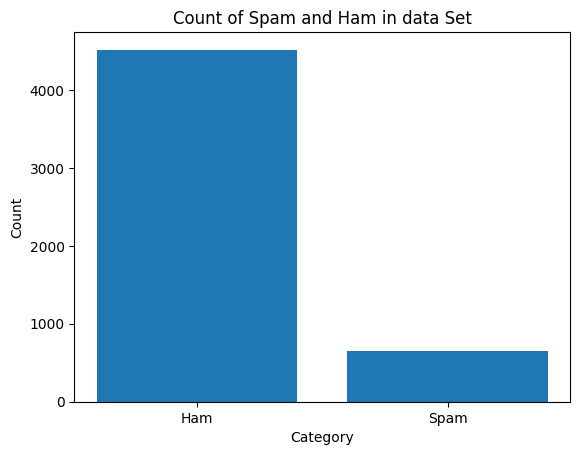

In [17]:
plt.bar(['Ham','Spam'],df['target'].value_counts())
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Spam and Ham in data Set")
plt.show()

In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import nltk


In [20]:
df['num_characters']=df['text'].apply(len)

In [21]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [22]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/adarsh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/adarsh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

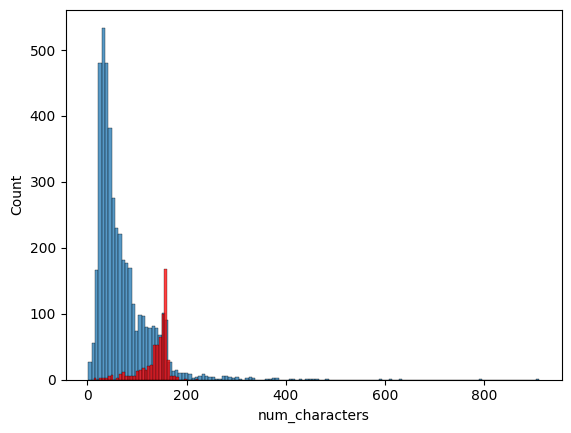

In [28]:
import seaborn as sns

sns.histplot(df[ df['target']==0]['num_characters'])
sns.histplot(df[ df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

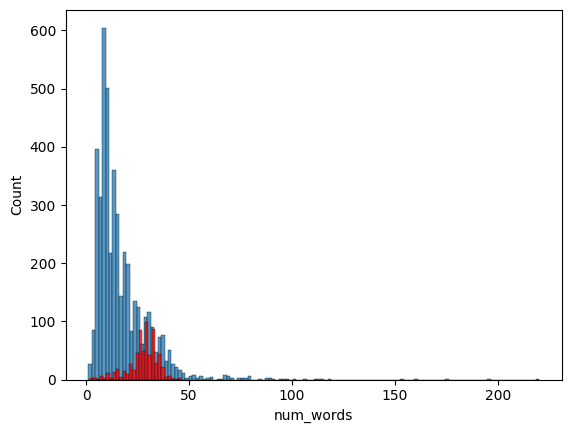

In [29]:
import seaborn as sns

sns.histplot(df[ df['target']==0]['num_words'])
sns.histplot(df[ df['target']==1]['num_words'],color='red')

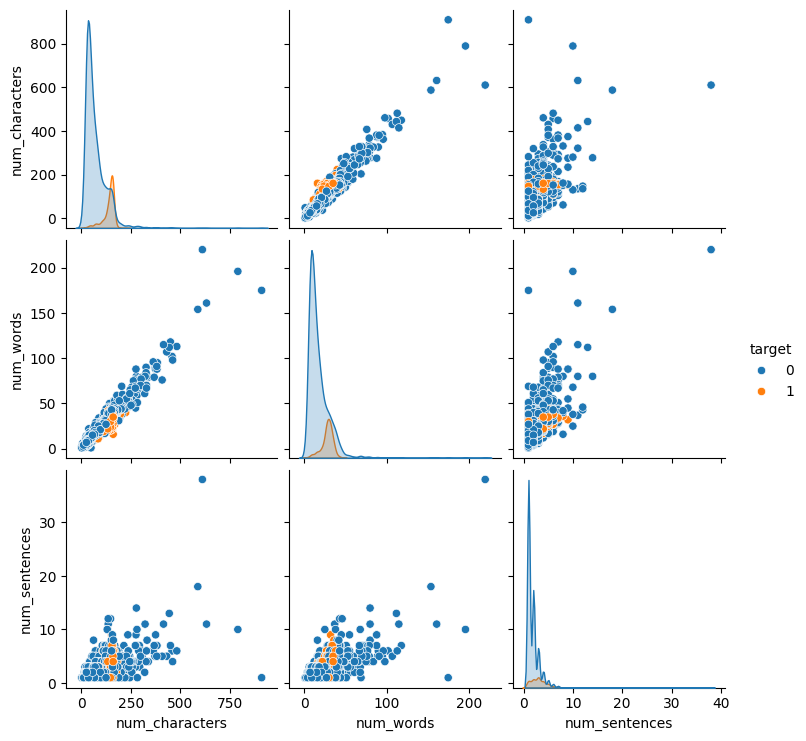

In [30]:
sns.pairplot(df,hue='target')

In [31]:
df_num=df.iloc[:,[0,2,3,4]]

<Axes: >

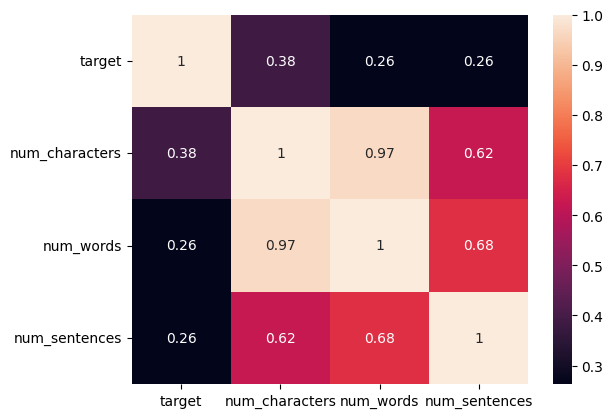

In [32]:
sns.heatmap(df_num.corr(),annot=True)

# Data Preprocessing
- Lower case
- Tokenization
- Removing Special Character
- Removing Stop Words and Puntuation 
- Stemming

In [33]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [36]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [37]:
df['transformed_text']=df['text'].apply(transform_text)

In [38]:
from turtle import width
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

<Figure size 1200x1600 with 0 Axes>

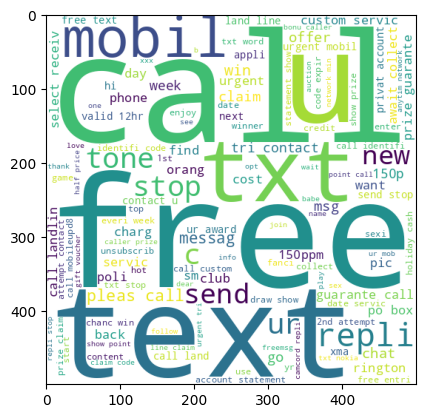

<Figure size 1200x1600 with 0 Axes>

In [41]:
plt.imshow(spam_wc)
plt.figure(figsize=(12,16))

<Figure size 1200x1600 with 0 Axes>

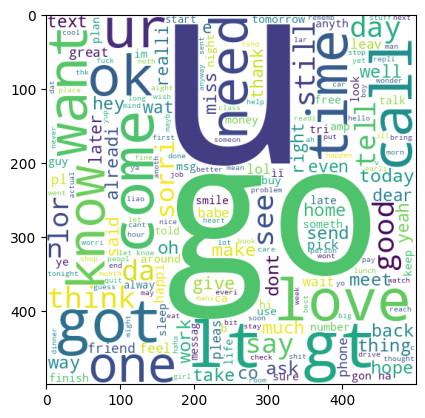

<Figure size 1200x1600 with 0 Axes>

In [42]:
# Ham Messages
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.figure(figsize=(12,16))

In [43]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

print(len(spam_corpus))

9939


In [44]:
from collections import Counter 
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

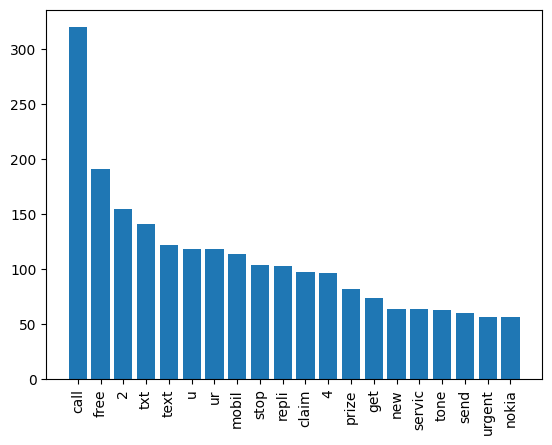

In [45]:
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')

In [46]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

print(len(ham_corpus))

35404


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one')])

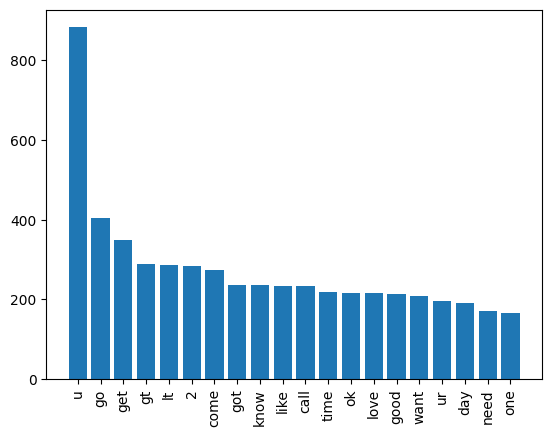

In [47]:
from collections import Counter 
Counter(ham_corpus).most_common(30)
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')

# Model Building 
- > Naive Bayse

In [ ]:
# converting text to vector 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv= CountVectorizer()
# tfidf=TfidfVectorizer()

In [49]:
X=cv.fit_transform(df['transformed_text']).toarray()


In [50]:
X.shape


(5169, 6708)

In [51]:
y=df['target'].values

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [53]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [54]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [55]:
# from sklearn.base import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score


gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))


0.8800773694390716
0.5315315315315315
[[792 104]
 [ 20 118]]


In [56]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9642166344294004
0.8344370860927153
[[871  25]
 [ 12 126]]


In [57]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9700193423597679
0.9734513274336283
[[893   3]
 [ 28 110]]


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
import xgboost


svc=SVC()
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbdt=GradientBoostingClassifier()
xgb=XGBClassifier()

In [60]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy,precision

In [62]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9709864603481625, 0.990909090909091)

In [63]:
acc_score=[]
pre_score=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("accuracy_score :",current_accuracy)
    print("current_precision : ",current_precision)
    
    acc_score.append(current_accuracy)
    pre_score.append(current_precision)

For  SVC
accuracy_score : 0.9709864603481625
current_precision :  0.990909090909091
For  KN
accuracy_score : 0.90715667311412
current_precision :  1.0
For  NB
accuracy_score : 0.9642166344294004
current_precision :  0.8344370860927153
For  DT
accuracy_score : 0.9564796905222437
current_precision :  0.8907563025210085
For  LR
accuracy_score : 0.9787234042553191
current_precision :  0.9915254237288136
For  RF
accuracy_score : 0.9729206963249516
current_precision :  0.9824561403508771
For  AdaBoost
accuracy_score : 0.9197292069632496
current_precision :  0.9365079365079365
For  Bgc
accuracy_score : 0.9564796905222437
current_precision :  0.911504424778761
For  ETC
accuracy_score : 0.9777562862669246
current_precision :  0.9831932773109243
For  GBDT
accuracy_score : 0.9584139264990329
current_precision :  0.9523809523809523
For  xgb
accuracy_score : 0.9787234042553191
current_precision :  0.9754098360655737


In [73]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_score,'Precision':pre_score})

In [74]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.970986,0.990909
1,KN,0.907157,1.000000
2,NB,0.964217,0.834437
3,DT,0.956480,0.890756
4,LR,0.978723,0.991525
5,RF,0.972921,0.982456
6,AdaBoost,0.919729,0.936508
7,Bgc,0.956480,0.911504
8,ETC,0.977756,0.983193
9,GBDT,0.958414,0.952381


In [79]:
performance_df2=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':acc_score,'Precision':pre_score}).sort_values('Accuracy',ascending=False)

In [80]:
performance_df2

,Algorithm,Accuracy,Precision
4,LR,0.978723,0.991525
10,xgb,0.978723,0.975410
8,ETC,0.977756,0.983193
5,RF,0.972921,0.982456
0,SVC,0.970986,0.990909
2,NB,0.964217,0.834437
9,GBDT,0.958414,0.952381
7,Bgc,0.956480,0.911504
3,DT,0.956480,0.890756
6,AdaBoost,0.919729,0.936508


In [84]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))